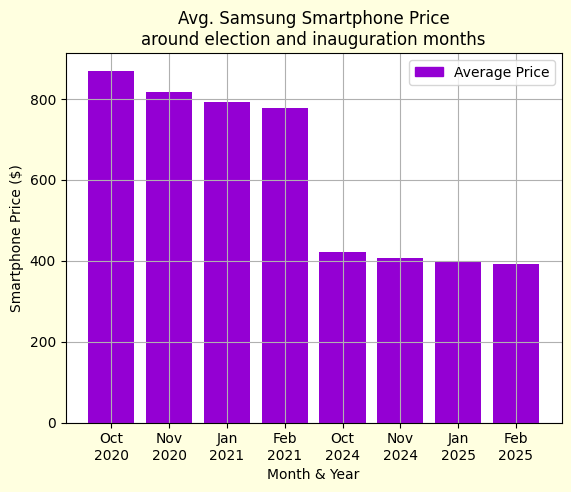

In [ ]:
# Activity 8S - Author: Nora Temkin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatches



# Data Project Question: how did smartphone prices change in the 2 months bracketing
## the election and the inauguration in the past 2 presidential election cycles?
### Data sources: the Bureau of Labor Statistics' Consumer Price Index for series 'Smartphones',
#### and Samsung's archived price data for Jan. 2020
def get_df_from_csv(filename):
    try:
        data_df = pd.read_csv(filename)
        return data_df
    except IOError:
        print("Error opening csv file. Could not create DataFrame.")
        return None

def find_base_price(price_df, cpi_df, cpi_month, yr_offset):
    bkwds_coefficient = 100 / cpi_df.loc[cpi_df.index[0 + yr_offset], cpi_month]
    avg_base_price = round(bkwds_coefficient * price_df['MSRP'].mean(), 2)
    return avg_base_price

def build_compare_list(cpi_df, base_price, base_yr, yr_month_tuplist):
    price_compare_tuplist = []
    for time in yr_month_tuplist:
        year = time[0]
        month = time[1]
        price = round(base_price * (cpi_df.loc[cpi_df.index[year - base_yr], month] / 100), 2)
        price_compare_tuplist.append((month + '\n' + str(year), price))
    return price_compare_tuplist

def price_compare_bargraph(prices_tuplist):
    fig, ax = plt.subplots()
    plt.title('Avg. Samsung Smartphone Price\naround election and inauguration months')
    fig.set_facecolor('lightyellow')
    for month in prices_tuplist:
        ax.bar(month[0], month[1], color='darkviolet')
    price_patch = mplpatches.Patch(color='darkviolet', label='Average Price')
    ax.legend(handles=[price_patch], loc='upper right')
    ax.set_xlabel('Month & Year')
    ax.set_ylabel('Smartphone Price ($)')
    ax.grid()
    plt.show()
    print()
    fig.savefig('Election_Smartphone_Prices.jpg')

# Main execution area
cpi_smartphones_df = get_df_from_csv('SeriesReport-SmartPhone-CPI-2019-2025-Data-Only.csv')
smsg_prices_2020_df = get_df_from_csv('SeriesReport-SmartPhone-CPI-2019-2025_Jan2020Prices.csv')
smsg_prices_2020_df['UPC'] = round(smsg_prices_2020_df['UPC'], 0).astype(str)
avg_base_price = find_base_price(smsg_prices_2020_df, cpi_smartphones_df, 'Jan', 1)
target_months = [(2020, 'Oct'), (2020, 'Nov'), (2021, 'Jan'), (2021, 'Feb'), \
                 (2024, 'Oct'), (2024, 'Nov'), (2025, 'Jan'), (2025, 'Feb')]
price_list_by_month = build_compare_list(cpi_smartphones_df, avg_base_price, 2019, target_months)
price_compare_bargraph(price_list_by_month)